<a href="https://colab.research.google.com/github/sankalp294/cognifyz-ds-internship/blob/main/08_Customer_Preference_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Top cuisines by average rating:
 Cuisines
Italian, Deli                      4.9
American, Coffee and Tea           4.9
American, BBQ, Sandwich            4.9
BBQ, Breakfast, Southern           4.9
Italian, Bakery, Continental       4.9
American, Burger, Grill            4.9
Hawaiian, Seafood                  4.9
Mexican, American, Healthy Food    4.9
American, Caribbean, Seafood       4.9
Mughlai, Lucknowi                  4.9
Name: Aggregate rating, dtype: float64

🔹 Top cuisines by total votes:
 Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64

✅ Combined Cuisine Analysis:
                             

/tmp/ipython-input-1-3496370581.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10["Average Rating"], y=top10.index, palette="viridis")


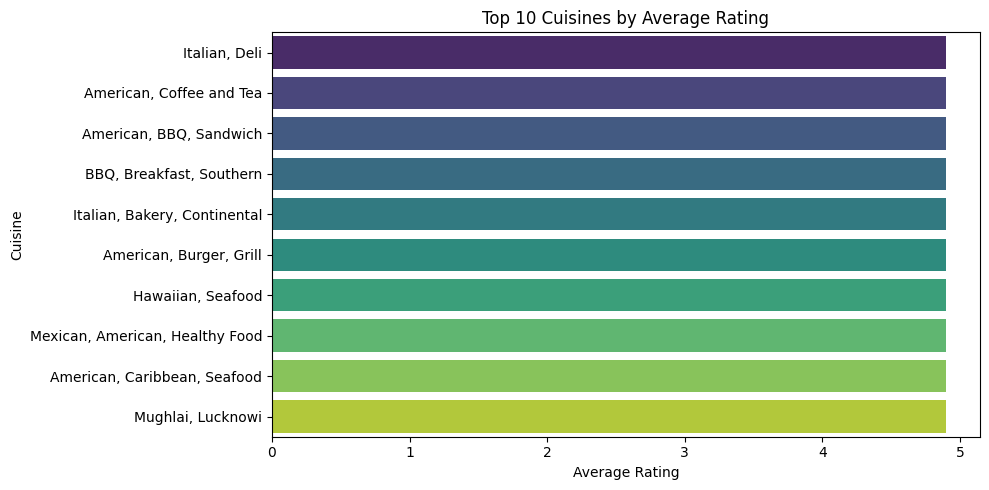

/tmp/ipython-input-1-3496370581.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_voted["Total Votes"], y=top_voted.index, palette="magma")


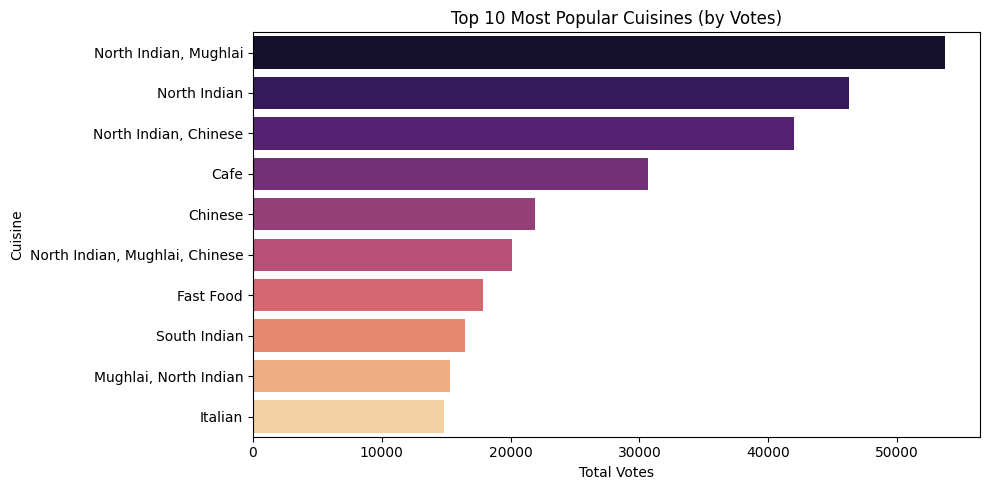

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load cleaned dataset
df = pd.read_csv("cleaned_dataset (1).csv", encoding="utf-8")

# Optional: drop rows with missing Cuisines or Ratings
df = df.dropna(subset=["Cuisines", "Aggregate rating"])

# 2️⃣ Group by Cuisines: average rating
avg_rating = df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)
print("🔹 Top cuisines by average rating:\n", avg_rating.head(10))

# 3️⃣ Group by Cuisines: total votes
total_votes = df.groupby("Cuisines")["Votes"].sum().sort_values(ascending=False)
print("\n🔹 Top cuisines by total votes:\n", total_votes.head(10))

# 4️⃣ Merge both into a single DataFrame
cuisine_analysis = pd.DataFrame({
    "Average Rating": avg_rating,
    "Total Votes": total_votes
}).dropna().sort_values(by="Average Rating", ascending=False)

# Display top 10 cuisines by rating
print("\n✅ Combined Cuisine Analysis:")
print(cuisine_analysis.head(10))

# 5️⃣ Optional Visualization: Top Rated Cuisines
plt.figure(figsize=(10, 5))
top10 = cuisine_analysis.head(10).sort_values("Average Rating")
sns.barplot(x=top10["Average Rating"], y=top10.index, palette="viridis")
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

# 6️⃣ Optional Visualization: Most Voted Cuisines
plt.figure(figsize=(10, 5))
top_voted = cuisine_analysis.sort_values("Total Votes", ascending=False).head(10)
sns.barplot(x=top_voted["Total Votes"], y=top_voted.index, palette="magma")
plt.title("Top 10 Most Popular Cuisines (by Votes)")
plt.xlabel("Total Votes")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()
